In [ ]:
import numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils

In [ ]:
# Graine aléatoire
seed = 21

In [ ]:
from google.colab import drive
import os
import cv2
import skimage
from skimage.transform import resize
import numpy as np

#On défini le repertoire  des images relatives à l'entrainement

#drive.mount('/content/drive') 
imageSize=75
train_dir = "./drive/My Drive/asl_alphabet_train_29000/asl_alphabet_train/"
#test_dir =  "./drive/My Drive/asl_alphabet_test_28/asl_alphabet_test/"

from tqdm import tqdm
def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []
    for folderName in os.listdir(folder):
      #Parcours des répertoires de notre répertoire d'entrainement et assignation des labels
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28           
            else:
                label = 29
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y
X_train, y_train = get_data(train_dir)

100%|██████████| 1000/1000 [03:18<00:00,  5.03it/s]


In [ ]:
#Normalisation des entrées de l'intervalle [0;255] vers [0;1] en divisant par 255
#X_test1 = X_test.astype('float32')
#X_test1 = X_test / 255.0

#X_train1 = X_train.astype('float32')
#X_train1 = X_train / 255.0

In [ ]:
from numpy import savetxt
from numpy import asarray
from numpy import save
#Enregistrement vers des fichiers csv
#savetxt('./drive/My Drive/Xdata_sign_language.csv', X_train, delimiter=',')
#savetxt('./drive/My Drive/ydata_sign_language.csv', y_train, delimiter=',')

#Enregistrement vers des fichiers npy
save('./drive/My Drive/Xdata_sign_language.npy', X_train)
save('./drive/My Drive/ydata_sign_language.npy', y_train)

In [ ]:
#Chargement des tableaux numpy à partir des fichiers npy
from numpy import load

X_train2 = load('./drive/My Drive/Xdata_sign_language.npy')
y_train2 = load('./drive/My Drive/ydata_sign_language.npy')

print(y_train2)

[19 19 19 ... 26 26 26]


In [ ]:
from google.colab import drive
import os
import cv2
import skimage
from skimage.transform import resize
import numpy as np
from sklearn.model_selection import train_test_split
from numpy import load

X_train2 = load('./drive/My Drive/Xdata_sign_language.npy')
y_train2 = load('./drive/My Drive/ydata_sign_language.npy')
X_train, X_test, y_train, y_test = train_test_split(X_train2, y_train2, test_size=0.2)

In [ ]:
y_train2 = np_utils.to_categorical(y_train2)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(Activation('relu'))

In [ ]:
model.add(Dropout(0.2))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
    
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [ ]:
model.add(Flatten())
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(256, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
    
model.add(Dense(128, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [ ]:
model.add(Dense(class_num))
model.add(Activation('softmax'))

In [ ]:
epochs = 10
optimizer = 'adam'

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 75, 75, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 75, 75, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 64)        0

In [ ]:
numpy.random.seed(seed)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)

Epoch 1/10
363/363 [==============================] - 953s 3s/step - loss: 1.6263 - accuracy: 0.5381 - val_loss: 12.7016 - val_accuracy: 0.0334
Epoch 2/10
363/363 [==============================] - 949s 3s/step - loss: 0.1434 - accuracy: 0.9651 - val_loss: 5.7150 - val_accuracy: 0.3253
Epoch 3/10
363/363 [==============================] - 951s 3s/step - loss: 0.0516 - accuracy: 0.9882 - val_loss: 1.2654 - val_accuracy: 0.6724
Epoch 4/10
363/363 [==============================] - 958s 3s/step - loss: 0.0505 - accuracy: 0.9877 - val_loss: 4.5349 - val_accuracy: 0.3909
Epoch 5/10
363/363 [==============================] - 958s 3s/step - loss: 0.0449 - accuracy: 0.9868 - val_loss: 1.3761 - val_accuracy: 0.6616
Epoch 6/10
363/363 [==============================] - 952s 3s/step - loss: 0.0233 - accuracy: 0.9944 - val_loss: 0.5384 - val_accuracy: 0.8259
Epoch 7/10
363/363 [==============================] - 963s 3s/step - loss: 0.0314 - accuracy: 0.9905 - val_loss: 2.0189 - val_accuracy: 0.636

In [ ]:
model.save('./drive/My Drive/ChristopheSignLanguageModel_3.h5')

In [ ]:
model2 = Sequential()

In [ ]:
model2.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(Conv2D(128, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())

model2.add(Flatten())
model2.add(Dropout(0.2))
model2.add(Dense(256, kernel_constraint=maxnorm(3)))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
    
model2.add(Dense(128, kernel_constraint=maxnorm(3)))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())

model2.add(Dense(class_num))
model2.add(Activation('softmax'))
epochs = 10
optimizer = 'adam'
model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
import matplotlib.pyplot as plt
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

class MetricsCheckpoint(Callback):
    """Callback that saves metrics after each epoch"""
    def __init__(self, savepath):
        super(MetricsCheckpoint, self).__init__()
        self.savepath = savepath
        self.history = {}
    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save(self.savepath, self.history)
        
def plotKerasLearningCurve():
    plt.figure(figsize=(10,5))
    metrics = np.load('logs.npy')[()]
    filt = ['acc'] # try to add 'loss' to see the loss learning curve
    for k in filter(lambda x : np.any([kk in x for kk in filt]), metrics.keys()):
        l = np.array(metrics[k])
        plt.plot(l, c= 'r' if 'val' not in k else 'b', label='val' if 'val' in k else 'train')
        x = np.argmin(l) if 'loss' in k else np.argmax(l)
        y = l[x]
        plt.scatter(x,y, lw=0, alpha=0.25, s=100, c='r' if 'val' not in k else 'b')
        plt.text(x, y, '{} = {:.4f}'.format(x,y), size='15', color= 'r' if 'val' not in k else 'b')   
    plt.legend(loc=4)
    plt.axis([0, None, None, None]);
    plt.grid()
    plt.xlabel('Number of epochs')
    plt.ylabel('Accuracy')

In [ ]:
numpy.random.seed(seed)
history = model2.fit(X_train2, y_train2, validation_data=(X_test, y_test), epochs=epochs, batch_size=64, callbacks = [MetricsCheckpoint('logs')])

Epoch 1/10
454/454 [==============================] - 1182s 3s/step - loss: 1.3042 - accuracy: 0.6258 - val_loss: 7.6970 - val_accuracy: 0.0384
Epoch 2/10
454/454 [==============================] - 1173s 3s/step - loss: 0.0846 - accuracy: 0.9806 - val_loss: 3.4539 - val_accuracy: 0.3752
Epoch 3/10
454/454 [==============================] - 1176s 3s/step - loss: 0.0729 - accuracy: 0.9808 - val_loss: 6.3395 - val_accuracy: 0.3386
Epoch 4/10
454/454 [==============================] - 1166s 3s/step - loss: 0.0839 - accuracy: 0.9766 - val_loss: 1.4738 - val_accuracy: 0.6926
Epoch 5/10
454/454 [==============================] - 1157s 3s/step - loss: 0.0251 - accuracy: 0.9932 - val_loss: 1.1680 - val_accuracy: 0.7757
Epoch 6/10
454/454 [==============================] - 1154s 3s/step - loss: 0.0418 - accuracy: 0.9877 - val_loss: 0.9500 - val_accuracy: 0.7678
Epoch 7/10
454/454 [==============================] - 1155s 3s/step - loss: 0.0366 - accuracy: 0.9882 - val_loss: 0.8222 - val_accuracy:

In [ ]:
def plot_learning_curve(history):
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./loss_curve.png')

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


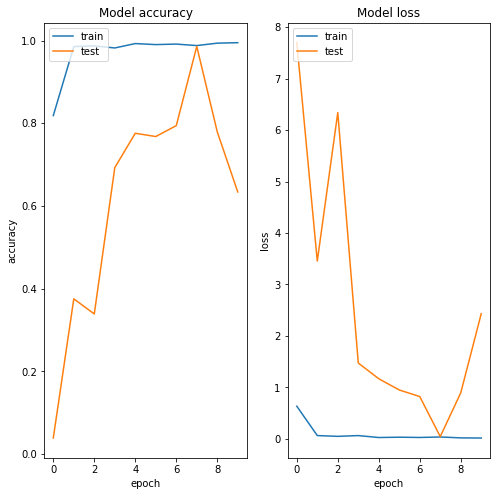

In [ ]:
plot_learning_curve(history)

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 93.45%
